# RULES

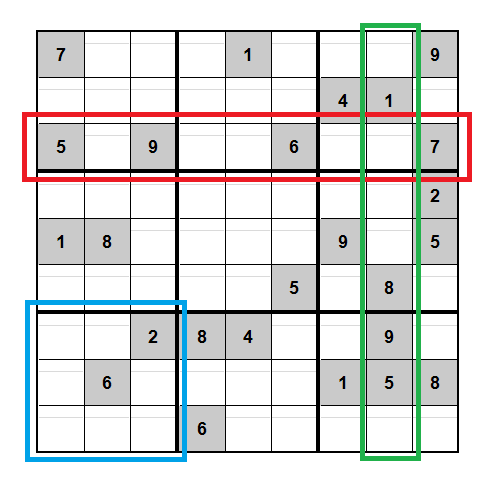

In [1]:
from IPython.display import Image 
Image(r'./sudoku/rules.png') 

# We write the Sudoku task as a string. Then we turn it into an array.

In [2]:
import numpy as np
def group(List, n):
    List = np.reshape(List, (n,-1)) 
    return List

In [3]:
#puzzle = '53..7....6..195....98....6.8...6...34..8.3..17...2...6.6....28....419..5....8..79'
puzzle = '003020600900305001001806400008102900700000008006708200002609500800203009005010300'
#puzzle = "200080300060070084030500209000105408000000000402706000301007040720040060004010003"
puzzle = "426819573983574216517236489158342967742968135369751842274685391835197624691423750" #easy
puzzle = '530070000600195000098000060800060003400803001700020006060000280000419005000080079'
#puzzle = '810030027062000090070000000000600100000000004008005070000000080000010750000070042' #hard
digits = [c for c in puzzle if c in "123456789.*0"]
grid = group(digits, 9)
print (grid)

[['5' '3' '0' '0' '7' '0' '0' '0' '0']
 ['6' '0' '0' '1' '9' '5' '0' '0' '0']
 ['0' '9' '8' '0' '0' '0' '0' '6' '0']
 ['8' '0' '0' '0' '6' '0' '0' '0' '3']
 ['4' '0' '0' '8' '0' '3' '0' '0' '1']
 ['7' '0' '0' '0' '2' '0' '0' '0' '6']
 ['0' '6' '0' '0' '0' '0' '2' '8' '0']
 ['0' '0' '0' '4' '1' '9' '0' '0' '5']
 ['0' '0' '0' '0' '8' '0' '0' '7' '9']]


# Sudoku display function

In [4]:
def display(grid) -> None:
    """Вывод Судоку """
    width = 2
    line = "+".join(["-" * (width * 3)] * 3)
    for row in range(9):
        print(
            "".join(
                grid[row][col].center(width) + ("|" if str(col) in "25" else "") for col in range(9)
            )
        )
        if str(row) in "25":
            print(line)
    print()

In [5]:
display(grid)

5 3 0 |0 7 0 |0 0 0 
6 0 0 |1 9 5 |0 0 0 
0 9 8 |0 0 0 |0 6 0 
------+------+------
8 0 0 |0 6 0 |0 0 3 
4 0 0 |8 0 3 |0 0 1 
7 0 0 |0 2 0 |0 0 6 
------+------+------
0 6 0 |0 0 0 |2 8 0 
0 0 0 |4 1 9 |0 0 5 
0 0 0 |0 8 0 |0 7 9 



# Functions for taking data from a square, row and column

In [6]:
def get_col (grid,i):
    return np.array(grid[i,:])

def get_row (grid,j):
    return np.array(grid[:,j])

def get_square (grid,i,j):
    if i < 3:
        a1,a2 = 0,3 
    elif i < 6:
        a1,a2 = 3,6
    else:
        a1,a2 = 6,9
        
    if j < 3:
        b1,b2 = 0,3 
    elif j < 6:
        b1,b2 = 3,6
    else:
        b1,b2 = 6,9
    return grid[a1:a2,b1:b2]

f1 = get_col (grid,0)
print(f1)
print()
f2 = get_row (grid,0)
print(f2)
print()
s1 = get_square (grid,9,9)
print(s1)

['5' '3' '0' '0' '7' '0' '0' '0' '0']

['5' '6' '0' '8' '4' '7' '0' '0' '0']

[['2' '8' '0']
 ['0' '0' '5']
 ['0' '7' '9']]


# Search function for numbers that have not been used in a square, row and column

In [7]:
def not_used_numbers (mas):
    return [c for c in "123456789" if c not in mas ]

print(f1)
rf1 = not_used_numbers (f1)
print("Not used numbers")
print(rf1)
print()
print(s1)
rs1 = not_used_numbers (s1)
print("Not used numbers")
print(rs1)

['5' '3' '0' '0' '7' '0' '0' '0' '0']
Not used numbers
['1', '2', '4', '6', '8', '9']

[['2' '8' '0']
 ['0' '0' '5']
 ['0' '7' '9']]
Not used numbers
['1', '3', '4', '6']


# The function of searching for numbers that can be in a cell, based on the numbers that are in a row, column and square

In [8]:
def numbers_that_can_be_used (grid, i, j):
    n_col = not_used_numbers (get_col (grid,i)); n_row = not_used_numbers (get_row (grid,j)); n_square = not_used_numbers (get_square (grid,i,j))
    numbers_that_can_be_used = np.intersect1d(n_square, n_col); numbers_that_can_be_used = np.intersect1d(numbers_that_can_be_used, n_row); numbers_that_can_be_used = np.setdiff1d(numbers_that_can_be_used,[".*0"])
    return numbers_that_can_be_used
display(grid)

i = 1; j = 1
print(f"numbers_that_can_be_used for {i},{j}, number {grid[i][j]} is {numbers_that_can_be_used (grid, i, j)}")  
    
    

5 3 0 |0 7 0 |0 0 0 
6 0 0 |1 9 5 |0 0 0 
0 9 8 |0 0 0 |0 6 0 
------+------+------
8 0 0 |0 6 0 |0 0 3 
4 0 0 |8 0 3 |0 0 1 
7 0 0 |0 2 0 |0 0 6 
------+------+------
0 6 0 |0 0 0 |2 8 0 
0 0 0 |4 1 9 |0 0 5 
0 0 0 |0 8 0 |0 7 9 

numbers_that_can_be_used for 1,1, number 0 is ['2' '4' '7']


# The function of creating a dictionary that shows what numbers are in the cell and a set of numbers from which you need to select the number you need

In [9]:
def f(i,j):return i*9+j
def create_N(grid):
    N = {}
    for i in range (9):
        for j in range (9):
            if grid[i,j] not in ".*0": 
                N[f(i,j)] = grid[i,j];
            else: N[f(i,j)] = numbers_that_can_be_used (grid, i, j)
            print(N[f(i,j)], end = " " )
    print("\n\n")
    return N

N = create_N(grid)
#NOT CORRECT
def create_mas_with_solutions (grid, N):
    mas = np.zeros((9,9))
    mas = mas.astype(str)
    for i in range (9):
        for j in range (9):
            mas[i][j] = str(N[f(i,j)][0])
    return mas
            
mas = create_mas_with_solutions (grid,N)

5 3 ['1' '2' '4'] ['2' '6'] 7 ['2' '4' '6' '8'] ['1' '4' '8' '9'] ['1' '2' '4' '9'] ['2' '4' '8'] 6 ['2' '4' '7'] ['2' '4' '7'] 1 9 5 ['3' '4' '7' '8'] ['2' '3' '4'] ['2' '4' '7' '8'] ['1' '2'] 9 8 ['2' '3'] ['3' '4'] ['2' '4'] ['1' '3' '4' '5' '7'] 6 ['2' '4' '7'] 8 ['1' '2' '5'] ['1' '2' '5' '9'] ['5' '7' '9'] 6 ['1' '4' '7'] ['4' '5' '7' '9'] ['2' '4' '5' '9'] 3 4 ['2' '5'] ['2' '5' '6' '9'] 8 ['5'] 3 ['5' '7' '9'] ['2' '5' '9'] 1 7 ['1' '5'] ['1' '3' '5' '9'] ['5' '9'] 2 ['1' '4'] ['4' '5' '8' '9'] ['4' '5' '9'] 6 ['1' '3' '9'] 6 ['1' '3' '4' '5' '7' '9'] ['3' '5' '7'] ['3' '5'] ['7'] 2 8 ['4'] ['2' '3'] ['2' '7' '8'] ['2' '3' '7'] 4 1 9 ['3' '6'] ['3'] 5 ['1' '2' '3'] ['1' '2' '4' '5'] ['1' '2' '3' '4' '5'] ['2' '3' '5' '6'] 8 ['2' '6'] ['1' '3' '4' '6'] 7 9 




In [10]:
m = np.array([])
for i in N.keys():
    m = np.append(m,i)
m = m.reshape(9,9)

def find_indexes_for_element_of_N (a):
    j,i = np.where(m == a) 
    return j[0],i[0]

print(find_indexes_for_element_of_N (2))
#N_keys_with_indexes = group(N.keys(), 9)


(0, 2)


# A function to check that all numbers in a row, column, and square are different by comparing the quantity of different numbers with 9

In [11]:
def check_i_j_correct (mas,i,j):
    str_col = np.unique(get_col (mas,i))
    str_col1 =  1 if len(str_col)==9 else 0
    
    str_col = np.unique(get_row (mas,j))
    str_col2 =  1 if len(str_col)==9 else 0
    
    str_col = np.unique(get_square (mas,i,j))
    str_col3 =  1 if len(str_col)==9 else 0
    
    return str_col1 and str_col2 and str_col3

def check_answer (grid): 
    for i in range(9):
        for j in range(9):
            if check_i_j_correct (grid,i,j) == False: return False
    return True

# print(''.join(get_col (mas,i)))

# print(check_str (mas,i))

# def check_if_correct (mas):
#     for i in range (9):
#         for j in range (9):

In [12]:
def check_neighbor(grid,i,j,i1,j1):
    if (len(np.unique(get_square (grid,i,j) == get_square (grid,i1,j1))) == 1) or i == i1 or j == j1: return True
    else: return False

print (check_neighbor(grid,0,0,2,2) )   

True


# Function to create a graph from the previous dictionary and neighborhood

In [13]:
def del_for_N_i_j_k(N,i,j):
    for i1 in range (9):
        for j1 in range (9):
            if check_neighbor(grid,i,j,i1,j1) and (f(i,j) != f(i1,j1)) and len(N[f(i1,j1)]) > 1:
                if np.size(np.where(N[f(i1,j1)]==N[f(i,j)])[0]) != 0: 
                    N[f(i1,j1)] = np.delete(N[f(i1,j1)],np.where(N[f(i1,j1)]==N[f(i,j)])[0][0])
    return N
    

In [14]:
def check_lenght_dictionary(N1,N2):
    for i,j in zip(N1.keys(),N2.keys()):
        if len(N1[i]) != len(N2[j]): return True
    return False
def delete_1_element_masive (N):
    for i in range (9):
        for j in range (9):
            if len(N[f(i,j)]) == 1  and isinstance(N[f(i,j)],np.ndarray):
                N[f(i,j)] = N[f(i,j)][0]
                N = del_for_N_i_j_k(N,i,j)
    return N

def write_in_grid (N):
    for i in N.keys():
        if len(N[i])>1:return 0
    grid = np.zeros((9,9),str)
    for i in range (9):
        for j in range (9):
            grid[i][j] = N[f(i,j)]
    return grid
display(grid)


def try_to_find_solution_1(N):
    N_check = delete_1_element_masive (N.copy())
    while check_lenght_dictionary(N,N_check):
        N = N_check.copy()
        N_check = delete_1_element_masive (N_check.copy())   
      #  print(N_check)
#         for key, val in N_check.items():
#             print('{}:{}\n'.format(key, val))
      #  print()
    return N_check




                            
            

5 3 0 |0 7 0 |0 0 0 
6 0 0 |1 9 5 |0 0 0 
0 9 8 |0 0 0 |0 6 0 
------+------+------
8 0 0 |0 6 0 |0 0 3 
4 0 0 |8 0 3 |0 0 1 
7 0 0 |0 2 0 |0 0 6 
------+------+------
0 6 0 |0 0 0 |2 8 0 
0 0 0 |4 1 9 |0 0 5 
0 0 0 |0 8 0 |0 7 9 



In [15]:
def try_different_labels_for_object_with_minimum_size(N,sup_grid):
    l = 9
    for i in N.keys():
        if len(N[i])<l and isinstance(N[i],np.ndarray): l = len(N[i])
    for i in range (9):
#         break_out_flag = False
#         if break_out_flag: break
        for j in range (9):
            if len(N[f(i,j)]) == l and isinstance(N[f(i,j)],np.ndarray):
                for k in range (l):
                    N_c = N.copy()
                    N_c[f(i,j)] = N_c[f(i,j)][k]
                    N_c = del_for_N_i_j_k(N_c,i,j)
                    N_c = try_to_find_solution_1(N_c)
                    build_grid = True 
                    for r in N_c.keys():
                        if len(N_c[r]) > 1 and isinstance(N_c[r],np.ndarray): 
                            try_different_labels_for_object_with_minimum_size(N_c, sup_grid); 
                            build_grid = False; break
                    if build_grid: 
                        grid_test = write_in_grid (N_c)
                        #display(grid_test)
                        #print("END DISPLAY", check_answer (grid_test))
                        if check_answer (grid_test):
                            #print("grid_test",grid_test)
                            if len(sup_grid) == 0: sup_grid[len(sup_grid)] = grid_test; display(grid_test) ; 
                            if np.array([grid_test != sup_grid[k] for k in sup_grid.keys()]).all() and len(sup_grid) > 0: sup_grid[len(sup_grid)]  = grid_test; display(grid_test)
#                             else: print ("FALSE")
#             break_out_flag = True
#             break

sup_grid ={}

display(grid)
print ("ANSWER \n")
try_different_labels_for_object_with_minimum_size(N,sup_grid)



5 3 0 |0 7 0 |0 0 0 
6 0 0 |1 9 5 |0 0 0 
0 9 8 |0 0 0 |0 6 0 
------+------+------
8 0 0 |0 6 0 |0 0 3 
4 0 0 |8 0 3 |0 0 1 
7 0 0 |0 2 0 |0 0 6 
------+------+------
0 6 0 |0 0 0 |2 8 0 
0 0 0 |4 1 9 |0 0 5 
0 0 0 |0 8 0 |0 7 9 

ANSWER 

5 3 4 |6 7 8 |9 1 2 
6 7 2 |1 9 5 |3 4 8 
1 9 8 |3 4 2 |5 6 7 
------+------+------
8 5 9 |7 6 1 |4 2 3 
4 2 6 |8 5 3 |7 9 1 
7 1 3 |9 2 4 |8 5 6 
------+------+------
9 6 1 |5 3 7 |2 8 4 
2 8 7 |4 1 9 |6 3 5 
3 4 5 |2 8 6 |1 7 9 



# Other studies, failed paths and tricks

In [16]:
N1 = {}
for i in N.keys():
     if len(N[i])> 1: N1[i] = N[i]; print (N[i], end = " ")
print("\n\nN1")
N1

['1' '2' '4'] ['2' '6'] ['2' '4' '6' '8'] ['1' '4' '8' '9'] ['1' '2' '4' '9'] ['2' '4' '8'] ['2' '4' '7'] ['2' '4' '7'] ['3' '4' '7' '8'] ['2' '3' '4'] ['2' '4' '7' '8'] ['1' '2'] ['2' '3'] ['3' '4'] ['2' '4'] ['1' '3' '4' '5' '7'] ['2' '4' '7'] ['1' '2' '5'] ['1' '2' '5' '9'] ['5' '7' '9'] ['1' '4' '7'] ['4' '5' '7' '9'] ['2' '4' '5' '9'] ['2' '5'] ['2' '5' '6' '9'] ['5' '7' '9'] ['2' '5' '9'] ['1' '5'] ['1' '3' '5' '9'] ['5' '9'] ['1' '4'] ['4' '5' '8' '9'] ['4' '5' '9'] ['1' '3' '9'] ['1' '3' '4' '5' '7' '9'] ['3' '5' '7'] ['3' '5'] ['2' '3'] ['2' '7' '8'] ['2' '3' '7'] ['3' '6'] ['1' '2' '3'] ['1' '2' '4' '5'] ['1' '2' '3' '4' '5'] ['2' '3' '5' '6'] ['2' '6'] ['1' '3' '4' '6'] 

N1


{2: array(['1', '2', '4'], dtype='<U1'),
 3: array(['2', '6'], dtype='<U1'),
 5: array(['2', '4', '6', '8'], dtype='<U1'),
 6: array(['1', '4', '8', '9'], dtype='<U1'),
 7: array(['1', '2', '4', '9'], dtype='<U1'),
 8: array(['2', '4', '8'], dtype='<U1'),
 10: array(['2', '4', '7'], dtype='<U1'),
 11: array(['2', '4', '7'], dtype='<U1'),
 15: array(['3', '4', '7', '8'], dtype='<U1'),
 16: array(['2', '3', '4'], dtype='<U1'),
 17: array(['2', '4', '7', '8'], dtype='<U1'),
 18: array(['1', '2'], dtype='<U1'),
 21: array(['2', '3'], dtype='<U1'),
 22: array(['3', '4'], dtype='<U1'),
 23: array(['2', '4'], dtype='<U1'),
 24: array(['1', '3', '4', '5', '7'], dtype='<U1'),
 26: array(['2', '4', '7'], dtype='<U1'),
 28: array(['1', '2', '5'], dtype='<U1'),
 29: array(['1', '2', '5', '9'], dtype='<U1'),
 30: array(['5', '7', '9'], dtype='<U1'),
 32: array(['1', '4', '7'], dtype='<U1'),
 33: array(['4', '5', '7', '9'], dtype='<U1'),
 34: array(['2', '4', '5', '9'], dtype='<U1'),
 37: array(['2'

In [17]:
def f1 (i,j,k):return f(i,j)+k*9*9
def create_G (N):
    G = {}; M = {}
    for i in range (9):
        for j in range (9):
            if f(i,j) in N:
                for k in N[f(i,j)]:
                    k = int(k)
                    G[f1(i,j,k)] = {};
                    for i1 in range (9):
                        for j1 in range (9):
                            if f(i1,j1) in N:
                                for k1 in N[f(i1,j1)]:
                                    k1 = int(k1)
                                    if  check_neighbor(grid,i,j,i1,j1) and (f(i,j) != f(i1,j1)) and (k != k1) and (str(k1) in N[f(i1,j1)]):# and (f1(i1,j1,k1) not in G[f1(i,j,k)]): 
                                        G[f1(i,j,k)][f1(i1,j1,k1)] = [i,j,k,i1,j1,k1];M[f(i,j)] = {}; M[f(i,j)][f(i1,j1)] = [i,j,i1,j1]
                                        if f1(i1,j1,k1) not in G: G[f1(i1,j1,k1)] = {}; 
                                        if f1(i,j,k) not in G[f1(i1,j1,k1)]:G[f1(i1,j1,k1)][f1(i,j,k)] = [i1,j1,k1,i,j,k]
                                        if f(i1,j1) not in M: M[f(i1,j1)] = {}
                                        if f(i,j) not in M[f(i1,j1)]: M[f(i1,j1)][f(i,j)] = [i1,j1,i,j]
                                        
    return G, M
G, M = create_G (N)


In [18]:
G1, M1 = create_G (N1)

In [19]:
G1

{83: {165: [0, 2, 1, 0, 3, 2],
  489: [0, 2, 1, 0, 3, 6],
  167: [0, 2, 1, 0, 5, 2],
  329: [0, 2, 1, 0, 5, 4],
  491: [0, 2, 1, 0, 5, 6],
  653: [0, 2, 1, 0, 5, 8],
  330: [0, 2, 1, 0, 6, 4],
  654: [0, 2, 1, 0, 6, 8],
  735: [0, 2, 1, 0, 6, 9],
  169: [0, 2, 1, 0, 7, 2],
  331: [0, 2, 1, 0, 7, 4],
  736: [0, 2, 1, 0, 7, 9],
  170: [0, 2, 1, 0, 8, 2],
  332: [0, 2, 1, 0, 8, 4],
  656: [0, 2, 1, 0, 8, 8],
  172: [0, 2, 1, 1, 1, 2],
  334: [0, 2, 1, 1, 1, 4],
  577: [0, 2, 1, 1, 1, 7],
  173: [0, 2, 1, 1, 2, 2],
  335: [0, 2, 1, 1, 2, 4],
  578: [0, 2, 1, 1, 2, 7],
  180: [0, 2, 1, 2, 0, 2],
  191: [0, 2, 1, 3, 2, 2],
  434: [0, 2, 1, 3, 2, 5],
  758: [0, 2, 1, 3, 2, 9],
  200: [0, 2, 1, 4, 2, 2],
  443: [0, 2, 1, 4, 2, 5],
  524: [0, 2, 1, 4, 2, 6],
  767: [0, 2, 1, 4, 2, 9],
  290: [0, 2, 1, 5, 2, 3],
  452: [0, 2, 1, 5, 2, 5],
  776: [0, 2, 1, 5, 2, 9],
  299: [0, 2, 1, 6, 2, 3],
  380: [0, 2, 1, 6, 2, 4],
  461: [0, 2, 1, 6, 2, 5],
  623: [0, 2, 1, 6, 2, 7],
  785: [0, 2, 1, 6, 2, 9

In [20]:
M

{0: {72: [0, 0, 8, 0],
  1: [0, 0, 0, 1],
  2: [0, 0, 0, 2],
  3: [0, 0, 0, 3],
  4: [0, 0, 0, 4],
  5: [0, 0, 0, 5],
  6: [0, 0, 0, 6],
  7: [0, 0, 0, 7],
  8: [0, 0, 0, 8],
  9: [0, 0, 1, 0],
  10: [0, 0, 1, 1],
  11: [0, 0, 1, 2],
  18: [0, 0, 2, 0],
  19: [0, 0, 2, 1],
  20: [0, 0, 2, 2],
  27: [0, 0, 3, 0],
  36: [0, 0, 4, 0],
  45: [0, 0, 5, 0],
  54: [0, 0, 6, 0],
  63: [0, 0, 7, 0]},
 1: {73: [0, 1, 8, 1],
  2: [0, 1, 0, 2],
  3: [0, 1, 0, 3],
  4: [0, 1, 0, 4],
  5: [0, 1, 0, 5],
  6: [0, 1, 0, 6],
  7: [0, 1, 0, 7],
  8: [0, 1, 0, 8],
  9: [0, 1, 1, 0],
  10: [0, 1, 1, 1],
  11: [0, 1, 1, 2],
  18: [0, 1, 2, 0],
  19: [0, 1, 2, 1],
  20: [0, 1, 2, 2],
  28: [0, 1, 3, 1],
  37: [0, 1, 4, 1],
  46: [0, 1, 5, 1],
  55: [0, 1, 6, 1],
  64: [0, 1, 7, 1]},
 2: {74: [0, 2, 8, 2],
  3: [0, 2, 0, 3],
  4: [0, 2, 0, 4],
  5: [0, 2, 0, 5],
  6: [0, 2, 0, 6],
  7: [0, 2, 0, 7],
  8: [0, 2, 0, 8],
  9: [0, 2, 1, 0],
  10: [0, 2, 1, 1],
  11: [0, 2, 1, 2],
  18: [0, 2, 2, 0],
  19: [0, 2, 

In [21]:
N

{0: '5',
 1: '3',
 2: array(['1', '2', '4'], dtype='<U1'),
 3: array(['2', '6'], dtype='<U1'),
 4: '7',
 5: array(['2', '4', '6', '8'], dtype='<U1'),
 6: array(['1', '4', '8', '9'], dtype='<U1'),
 7: array(['1', '2', '4', '9'], dtype='<U1'),
 8: array(['2', '4', '8'], dtype='<U1'),
 9: '6',
 10: array(['2', '4', '7'], dtype='<U1'),
 11: array(['2', '4', '7'], dtype='<U1'),
 12: '1',
 13: '9',
 14: '5',
 15: array(['3', '4', '7', '8'], dtype='<U1'),
 16: array(['2', '3', '4'], dtype='<U1'),
 17: array(['2', '4', '7', '8'], dtype='<U1'),
 18: array(['1', '2'], dtype='<U1'),
 19: '9',
 20: '8',
 21: array(['2', '3'], dtype='<U1'),
 22: array(['3', '4'], dtype='<U1'),
 23: array(['2', '4'], dtype='<U1'),
 24: array(['1', '3', '4', '5', '7'], dtype='<U1'),
 25: '6',
 26: array(['2', '4', '7'], dtype='<U1'),
 27: '8',
 28: array(['1', '2', '5'], dtype='<U1'),
 29: array(['1', '2', '5', '9'], dtype='<U1'),
 30: array(['5', '7', '9'], dtype='<U1'),
 31: '6',
 32: array(['1', '4', '7'], dtype='

In [22]:
M1

{2: {74: [0, 2, 8, 2],
  3: [0, 2, 0, 3],
  5: [0, 2, 0, 5],
  6: [0, 2, 0, 6],
  7: [0, 2, 0, 7],
  8: [0, 2, 0, 8],
  10: [0, 2, 1, 1],
  11: [0, 2, 1, 2],
  18: [0, 2, 2, 0],
  29: [0, 2, 3, 2],
  38: [0, 2, 4, 2],
  47: [0, 2, 5, 2],
  56: [0, 2, 6, 2],
  65: [0, 2, 7, 2]},
 3: {75: [0, 3, 8, 3],
  5: [0, 3, 0, 5],
  6: [0, 3, 0, 6],
  7: [0, 3, 0, 7],
  8: [0, 3, 0, 8],
  21: [0, 3, 2, 3],
  22: [0, 3, 2, 4],
  23: [0, 3, 2, 5],
  30: [0, 3, 3, 3],
  48: [0, 3, 5, 3],
  57: [0, 3, 6, 3]},
 5: {77: [0, 5, 8, 5],
  6: [0, 5, 0, 6],
  7: [0, 5, 0, 7],
  8: [0, 5, 0, 8],
  21: [0, 5, 2, 3],
  22: [0, 5, 2, 4],
  23: [0, 5, 2, 5],
  32: [0, 5, 3, 5],
  50: [0, 5, 5, 5]},
 6: {78: [0, 6, 8, 6],
  7: [0, 6, 0, 7],
  8: [0, 6, 0, 8],
  15: [0, 6, 1, 6],
  16: [0, 6, 1, 7],
  17: [0, 6, 1, 8],
  24: [0, 6, 2, 6],
  26: [0, 6, 2, 8],
  33: [0, 6, 3, 6],
  42: [0, 6, 4, 6],
  51: [0, 6, 5, 6],
  69: [0, 6, 7, 6]},
 7: {52: [0, 7, 5, 7],
  8: [0, 7, 0, 8],
  15: [0, 7, 1, 6],
  16: [0, 7, 1, 

In [23]:
G1

{83: {165: [0, 2, 1, 0, 3, 2],
  489: [0, 2, 1, 0, 3, 6],
  167: [0, 2, 1, 0, 5, 2],
  329: [0, 2, 1, 0, 5, 4],
  491: [0, 2, 1, 0, 5, 6],
  653: [0, 2, 1, 0, 5, 8],
  330: [0, 2, 1, 0, 6, 4],
  654: [0, 2, 1, 0, 6, 8],
  735: [0, 2, 1, 0, 6, 9],
  169: [0, 2, 1, 0, 7, 2],
  331: [0, 2, 1, 0, 7, 4],
  736: [0, 2, 1, 0, 7, 9],
  170: [0, 2, 1, 0, 8, 2],
  332: [0, 2, 1, 0, 8, 4],
  656: [0, 2, 1, 0, 8, 8],
  172: [0, 2, 1, 1, 1, 2],
  334: [0, 2, 1, 1, 1, 4],
  577: [0, 2, 1, 1, 1, 7],
  173: [0, 2, 1, 1, 2, 2],
  335: [0, 2, 1, 1, 2, 4],
  578: [0, 2, 1, 1, 2, 7],
  180: [0, 2, 1, 2, 0, 2],
  191: [0, 2, 1, 3, 2, 2],
  434: [0, 2, 1, 3, 2, 5],
  758: [0, 2, 1, 3, 2, 9],
  200: [0, 2, 1, 4, 2, 2],
  443: [0, 2, 1, 4, 2, 5],
  524: [0, 2, 1, 4, 2, 6],
  767: [0, 2, 1, 4, 2, 9],
  290: [0, 2, 1, 5, 2, 3],
  452: [0, 2, 1, 5, 2, 5],
  776: [0, 2, 1, 5, 2, 9],
  299: [0, 2, 1, 6, 2, 3],
  380: [0, 2, 1, 6, 2, 4],
  461: [0, 2, 1, 6, 2, 5],
  623: [0, 2, 1, 6, 2, 7],
  785: [0, 2, 1, 6, 2, 9

In [24]:
# def different(N1,N2):
#     if len(N1) == len(N2):
#         for i in range(len(N1)):
#             if N1[i] != N1[i]: return True
#     else: return True
#     return False

# def check_diff(N_sup,N_c):
#     for l in range(len(N_sup)):
#         for i in N_sup[l]:
# #             if len(N_sup[l][i])>1:
#                 #print("N_sup[l][i], N_c[i] = ",N_sup[l][i] == N_c[i])
# #                 print(N_sup)
# #                 print(N_c)
#             if (N_sup[l] == N_c).any: return True
#     return False

In [25]:
sup_grid ={0: [['8', '1', '5', '4', '3', '9', '6', '2', '7'],
       ['3', '6', '2', '7', '5', '1', '4', '9', '8'],
       ['4', '7', '9', '2', '6', '8', '5', '1', '3'],
       ['9', '2', '4', '6', '8', '7', '1', '3', '5'],
       ['1', '5', '7', '3', '9', '2', '8', '6', '4'],
       ['6', '3', '8', '1', '4', '5', '2', '7', '9'],
       ['7', '4', '6', '5', '2', '3', '9', '8', '1'],
       ['2', '8', '3', '9', '1', '4', '7', '5', '6'],
       ['5', '9', '1', '8', '7', '6', '3', '4', '2']], 
 2: [['8', '1', '5', '4', '3', '9', '6', '2', '7'],
       ['3', '6', '2', '6', '5', '1', '4', '9', '8'],
     
       ['4', '7', '9', '2', '6', '8', '5', '1', '3'],
       ['9', '2', '4', '6', '8', '7', '1', '3', '5'],
       ['1', '5', '7', '3', '9', '2', '8', '6', '4'],
       ['6', '3', '8', '1', '4', '5', '2', '7', '9'],
       ['7', '4', '6', '5', '2', '3', '9', '8', '1'],
       ['2', '8', '3', '9', '1', '4', '7', '5', '6'],
       ['5', '9', '1', '8', '7', '6', '3', '4', '2']]}
grid_test = [['8', '1', '5', '4', '3', '9', '6', '2', '7'],
       ['3', '6', '2', '7', '5', '1', '4', '9', '8'],
       ['4', '7', '9', '2', '6', '8', '5', '1', '3'],
       ['9', '2', '4', '6', '8', '7', '1', '3', '5'],
       ['1', '5', '7', '3', '9', '2', '8', '6', '4'],
       ['6', '3', '8', '1', '4', '5', '2', '7', '9'],
       ['7', '4', '6', '5', '2', '3', '9', '8', '1'],
       ['2', '8', '3', '9', '1', '4', '7', '5', '6'],
       ['5', '9', '1', '8', '7', '6', '3', '4', '2']]

all([grid_test != sup_grid[k] for k in sup_grid.keys()])

False

In [26]:

def deletion_algorithm (N1,M1,G1):

#     for m1 in M1.keys():
#         for m2 in M1[m1].keys():
#             i = M1[m1][m2][0]; j = M1[m1][m2][1]; i1 = M1[m1][m2][2]; j1 = M1[m1][m2][3];
#             c = 0;
#             if f(i,j) in N1:
#                 for k in N1[f(i,j)]:
#                     k = int(k)
#                     break_out_flag = False
#                     if f(i1,j1) in N1:
#                         for k1 in N1[f(i1,j1)]:
#                             k1 = int(k1)
#                             if f1(i1,j1,k1) in G1[f1(i,j,k)]: c+=1; break_out_flag = True; break
#                     if break_out_flag:break
#                 #print(c, end = " ")
# #             print(f"{c} < {len(M1[m1].keys())}", end = " ")
# #             if c >= len(M1[m1].keys()): print("!!!")
#             if c != len(M1[m1].keys()):
#                 a = N1[f(i,j)]
#                 print(a,f(i,j))
#                 a = np.delete(a,np.where(a==str(k))[0][0])
#                 #N1[f(i,j)] = a
# #                     for z in N1[f(i,j)]:
# #                         z = int(z) 
# #                         del G1[f1(i,j,z)];
# #                     del N1[f(i,j)][k]
                        
                    
#                     #np.delete(N1[f(i,j)],str(k))
#             print(f"{c} , {len(M1[m1].keys())}")

    for m1 in M1.keys():
        c = 0
        for m2 in M1[m1].keys():
            i = M1[m1][m2][0]; j = M1[m1][m2][1]; i1 = M1[m1][m2][2]; j1 = M1[m1][m2][3];
            if m1 in N1:
                for k in N1[m1]:
                    k = int(k)
                    break_out_flag = False
                    if f(i1,j1) in N1:
                        for k1 in N1[f(i1,j1)]:
                            k1 = int(k1)
                            if f1(i1,j1,k1) in G1[f1(i,j,k)]: c+=1; break_out_flag = True; break
                    if break_out_flag:break
        if c != len(M1[m1].keys()): print(f"F c={c} len(M1[m1].keys()={len(M1[m1].keys())} {N[f(i,j)]} {M1[m1]}")            

    
#     for m1 in M1.keys():
#         for m2 in M1[m1].keys():
#             i = M1[m1][m2][0]; j = M1[m1][m2][1]; i1 = M1[m1][m2][2]; j1 = M1[m1][m2][3];
#             if f(i,j) in N1:
#                 for k in N1[f(i,j)]:
#                     k = int(k)
#                     if f(i1,j1) in N1:
#                         for k1 in N1[f(i1,j1)]:
#                             k1 = int(k1)
#                             if (f1(i1,j1,k1) not in G1)  or (f1(i,j,k) not in G1) or (f1(i1,j1,k1) not in G1[f1(i,j,k)]) or (f1(i,j,k) not in G[f1(i1,j1,k1)]):
#                                 if f1(i,j,k) in G1: del G1[f1(i,j,k)]
#                                 if f1(i1,j1,k1) in G1: del G1[f1(i1,j1,k1)]
                                #print("2", end = " ")
    return N1

N_we_got = deletion_algorithm (N,M,G) 
                

In [27]:
#[6, 8, 0, 8]
i = 6; j = 8; i1 = 0; j1 = 8; k = 4
for k1 in N[f(i1,j1)]:
    print(k1) 
    print(check_neighbor(grid,i,j,i1,j1) and (f(i,j) != f(i1,j1)) and (k != k1) and (str(k1) in N[f(i1,j1)])) #

2
True
4
True
8
True


In [28]:
G1

{83: {165: [0, 2, 1, 0, 3, 2],
  489: [0, 2, 1, 0, 3, 6],
  167: [0, 2, 1, 0, 5, 2],
  329: [0, 2, 1, 0, 5, 4],
  491: [0, 2, 1, 0, 5, 6],
  653: [0, 2, 1, 0, 5, 8],
  330: [0, 2, 1, 0, 6, 4],
  654: [0, 2, 1, 0, 6, 8],
  735: [0, 2, 1, 0, 6, 9],
  169: [0, 2, 1, 0, 7, 2],
  331: [0, 2, 1, 0, 7, 4],
  736: [0, 2, 1, 0, 7, 9],
  170: [0, 2, 1, 0, 8, 2],
  332: [0, 2, 1, 0, 8, 4],
  656: [0, 2, 1, 0, 8, 8],
  172: [0, 2, 1, 1, 1, 2],
  334: [0, 2, 1, 1, 1, 4],
  577: [0, 2, 1, 1, 1, 7],
  173: [0, 2, 1, 1, 2, 2],
  335: [0, 2, 1, 1, 2, 4],
  578: [0, 2, 1, 1, 2, 7],
  180: [0, 2, 1, 2, 0, 2],
  191: [0, 2, 1, 3, 2, 2],
  434: [0, 2, 1, 3, 2, 5],
  758: [0, 2, 1, 3, 2, 9],
  200: [0, 2, 1, 4, 2, 2],
  443: [0, 2, 1, 4, 2, 5],
  524: [0, 2, 1, 4, 2, 6],
  767: [0, 2, 1, 4, 2, 9],
  290: [0, 2, 1, 5, 2, 3],
  452: [0, 2, 1, 5, 2, 5],
  776: [0, 2, 1, 5, 2, 9],
  299: [0, 2, 1, 6, 2, 3],
  380: [0, 2, 1, 6, 2, 4],
  461: [0, 2, 1, 6, 2, 5],
  623: [0, 2, 1, 6, 2, 7],
  785: [0, 2, 1, 6, 2, 9

In [29]:
N_we_got

{0: '5',
 1: '3',
 2: array(['1', '2', '4'], dtype='<U1'),
 3: array(['2', '6'], dtype='<U1'),
 4: '7',
 5: array(['2', '4', '6', '8'], dtype='<U1'),
 6: array(['1', '4', '8', '9'], dtype='<U1'),
 7: array(['1', '2', '4', '9'], dtype='<U1'),
 8: array(['2', '4', '8'], dtype='<U1'),
 9: '6',
 10: array(['2', '4', '7'], dtype='<U1'),
 11: array(['2', '4', '7'], dtype='<U1'),
 12: '1',
 13: '9',
 14: '5',
 15: array(['3', '4', '7', '8'], dtype='<U1'),
 16: array(['2', '3', '4'], dtype='<U1'),
 17: array(['2', '4', '7', '8'], dtype='<U1'),
 18: array(['1', '2'], dtype='<U1'),
 19: '9',
 20: '8',
 21: array(['2', '3'], dtype='<U1'),
 22: array(['3', '4'], dtype='<U1'),
 23: array(['2', '4'], dtype='<U1'),
 24: array(['1', '3', '4', '5', '7'], dtype='<U1'),
 25: '6',
 26: array(['2', '4', '7'], dtype='<U1'),
 27: '8',
 28: array(['1', '2', '5'], dtype='<U1'),
 29: array(['1', '2', '5', '9'], dtype='<U1'),
 30: array(['5', '7', '9'], dtype='<U1'),
 31: '6',
 32: array(['1', '4', '7'], dtype='

In [30]:
for i in N_we_got.keys():
    print(f"{i}:{len(N_we_got[i])} {type(N_we_got[i])}")

0:1 <class 'numpy.str_'>
1:1 <class 'numpy.str_'>
2:3 <class 'numpy.ndarray'>
3:2 <class 'numpy.ndarray'>
4:1 <class 'numpy.str_'>
5:4 <class 'numpy.ndarray'>
6:4 <class 'numpy.ndarray'>
7:4 <class 'numpy.ndarray'>
8:3 <class 'numpy.ndarray'>
9:1 <class 'numpy.str_'>
10:3 <class 'numpy.ndarray'>
11:3 <class 'numpy.ndarray'>
12:1 <class 'numpy.str_'>
13:1 <class 'numpy.str_'>
14:1 <class 'numpy.str_'>
15:4 <class 'numpy.ndarray'>
16:3 <class 'numpy.ndarray'>
17:4 <class 'numpy.ndarray'>
18:2 <class 'numpy.ndarray'>
19:1 <class 'numpy.str_'>
20:1 <class 'numpy.str_'>
21:2 <class 'numpy.ndarray'>
22:2 <class 'numpy.ndarray'>
23:2 <class 'numpy.ndarray'>
24:5 <class 'numpy.ndarray'>
25:1 <class 'numpy.str_'>
26:3 <class 'numpy.ndarray'>
27:1 <class 'numpy.str_'>
28:3 <class 'numpy.ndarray'>
29:4 <class 'numpy.ndarray'>
30:3 <class 'numpy.ndarray'>
31:1 <class 'numpy.str_'>
32:3 <class 'numpy.ndarray'>
33:4 <class 'numpy.ndarray'>
34:4 <class 'numpy.ndarray'>
35:1 <class 'numpy.str_'>
36:1 

In [31]:
def get_values(d, keys, default=None):
    return (d.get(k, default) for k in keys)
d = {'a': '1', 'b': '2', 'c': '3'}
s = 'a3a2c'
print(''.join(get_values(d, s, ''))) # -> 113
inv_d = dict(zip(d.values(), d.keys()))
print(''.join(get_values(inv_d, s, ''))) # -> cb


113
cb


In [32]:
# for g1 in G1.keys():
#     for g2 in G1[g1].keys():
#         el = G1[g1][g2][3:6]; i = el[0];j = el[1];k = el[2];
#         if g2 in G1:
#             for g3 in G1[g2].keys():
#                 el1 = G1[g2][g3][3:6]; i1 = el1[0];j1 = el1[1];k1 = el1[2];
#                 if i == i1 or j == j1:
#                     if k == k1: 
            
#         print(G1[g1][g2],G1[g1][g2][3:6])

In [33]:
# def rule_1 (i):
#     m = np.array([])
#     for k in range (9):
#         if str(k) in N[f(i,j)]: 
#         for j in range(9):
            
            
                

In [34]:
q = np.array([[1,0],[0,1],[1,1]])
d = np.where(q==1)

for i, j in zip(d[0], d[1]):
    print(i,j)

0 0
1 1
2 0
2 1


In [35]:
a = 0; b = 1; c = 2
print(f"{a} IPT {b}, {c}, KPI UA")

0 IPT 1, 2, KPI UA


https://dementiy.github.io/assignments/sudoku/

In [36]:
# M = 9
# def puzzle(a):
#     for i in range(M):
#         for j in range(M):
#             print(a[i][j],end = " ")
#         print()
# def solve(grid, row, col, num):
#     for x in range(9):
#         if grid[row][x] == num:
#             return False   
#     for x in range(9):
#         if grid[x][col] == num:
#             return False


#     startRow = row - row % 3
#     startCol = col - col % 3
#     for i in range(3):
#         for j in range(3):
#             if grid[i + startRow][j + startCol] == num:
#                 return False
#     return True

# def Suduko(grid, row, col):

#     if (row == M - 1 and col == M):
#         return True
#     if col == M:
#         row += 1
#         col = 0
#     if grid[row][col] > 0:
#         return Suduko(grid, row, col + 1)
#     for num in range(1, M + 1, 1): 

#         if solve(grid, row, col, num):

#             grid[row][col] = num
#             if Suduko(grid, row, col + 1):
#                 return True
#         grid[row][col] = 0
#     return False

# '''0 means the cells where no value is assigned'''
# grid = [[2, 5, 0, 0, 3, 0, 9, 0, 1],
#         [0, 1, 0, 0, 0, 4, 0, 0, 0],
#         [4, 0, 7, 0, 0, 0, 2, 0, 8],
#         [0, 0, 5, 2, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 9, 8, 1, 0, 0],
#         [0, 4, 0, 0, 0, 3, 0, 0, 0],
#         [0, 0, 0, 3, 6, 0, 0, 7, 2],
#         [0, 7, 0, 0, 0, 0, 0, 0, 3],
#         [9, 0, 3, 0, 0, 0, 6, 0, 4]]

# if (Suduko(grid, 0, 0)):
#     puzzle(grid)
# else:
#     print("Solution does not exist:(")
